Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [2]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

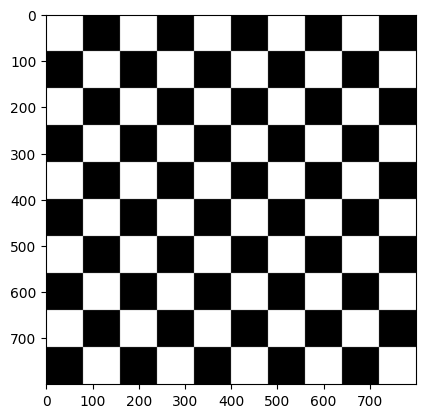

In [3]:
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
tamaño = 80 # Establecer el tamaño de las casillas
x = 0 # Coordenadas x
y = 0 # Coordenadas y
while True:
    gris_img[y:y+tamaño,x:x+tamaño] = 255
    x+=tamaño*2
    if x >= 800:
        y +=tamaño
        if y % (tamaño*2) == 0:
            x=0
        else:
            x = tamaño
    if y>= 800:
        break

plt.imshow(gris_img, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

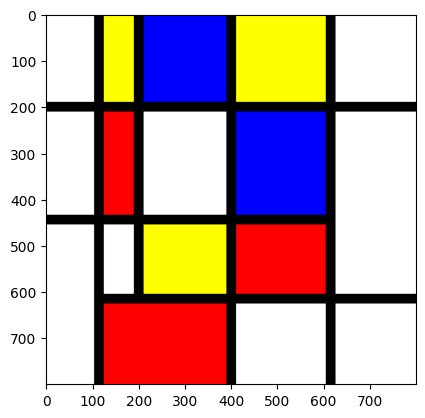

True

In [4]:
#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)
#Fondo blanco
color_img[:,:,0] = 255 
color_img[:,:,1] = 255 
color_img[:,:,2] = 255 

#Cuadrados amarillos
cv2.rectangle(color_img,(110,0),(200,200),(255,255,0),-3)
cv2.rectangle(color_img,(400,0),(620,200),(255,255,0),-3)
cv2.rectangle(color_img,(200,450),(400,620),(255,255,0),-3)

#Cuadrados rojos
cv2.rectangle(color_img,(110,200),(200,450),(255,0,0),-3)
cv2.rectangle(color_img,(110,620),(400,800),(255,0,0),-3)
cv2.rectangle(color_img,(400,450),(620,620),(255,0,0),-3)

#Cuadrados azules
cv2.rectangle(color_img,(110,200),(200,450),(255,0,0),-3)
cv2.rectangle(color_img,(400,200),(620,450),(0,0,255),-3)
cv2.rectangle(color_img,(200,0),(400,200),(0,0,255),-3)

#Lineas verticales
cv2.line(color_img,(int(ancho/4),0),(int(ancho/4),alto-190),(0,0,0),20)
cv2.line(color_img,(int(ancho/7),0),(int(ancho/7),alto),(0,0,0),20)
cv2.line(color_img,(int(ancho/1.3),0),(int(ancho/1.3),alto),(0,0,0),20)
cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(0,0,0),20)
cv2.line(color_img,(int(ancho/1.3),0),(int(ancho/1.3),alto),(0,0,0),20)

#Lineas horizontales
cv2.line(color_img,(ancho,int(alto/4)),(0,int(alto/4)),(0,0,0),20)
cv2.line(color_img,(ancho-190,int(alto/1.8)),(0,int(alto/1.8)),(0,0,0),20)
cv2.line(color_img,(ancho,int(alto/1.3)),(120,int(alto/1.3)),(0,0,0),20)


plt.imshow(color_img) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [5]:
# Abrir cámara en Windows
vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    h, w, _ = frame.shape


    b = frame[:,:,0]
    g = frame[:,:,1]
    r = frame[:,:,2]

    # Convertir cada canal a 3D para poder mostrarlo en color falso
    b_img = cv2.merge([b, r, r])
    g_img = cv2.merge([g, g, g])
    r_img = cv2.merge([r, r, r])

    # Concatenar en horizontal
    collage = np.hstack((r_img, g_img, b_img))

    # Redimensionar para que quepa en pantalla

    cv2.imshow('RGB channels', collage)

    # ESC para salir
    if cv2.waitKey(1) == 27:
        break

vid.release()
cv2.destroyAllWindows()


TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [6]:

vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Píxel más oscuro
    min_loc = np.unravel_index(np.argmin(gray), gray.shape)
    # Píxel más claro
    max_loc = np.unravel_index(np.argmax(gray), gray.shape)

    # Dibujar círculos
    cv2.circle(frame, (min_loc[1], min_loc[0]), 5, (0,0,255), 2)   # rojo
    cv2.circle(frame, (max_loc[1], max_loc[0]), 5, (0,255,0), 2)   # verde

    cv2.imshow('dark_light_pixel', frame)

    if cv2.waitKey(1) == 27:  # ESC para salir
        break

vid.release()
cv2.destroyAllWindows()

In [14]:
vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)
block_size = 8

while True:
    ret, frame = vid.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    min_avg = 256
    max_avg = -1
    min_loc = (0,0)
    max_loc = (0,0)

    # Recorremos a saltos del tamaño del bloque
    for y in range(0, h - block_size + 1, block_size):
        for x in range(0, w - block_size + 1, block_size):
            block = gray[y:y+block_size, x:x+block_size]
            avg = np.mean(block)
            if avg < min_avg:
                min_avg = avg
                min_loc = (x, y)
            if avg > max_avg:
                max_avg = avg
                max_loc = (x, y)

    # Dibujar círculos en el centro de cada bloque
    cv2.circle(frame, (min_loc[0]+block_size//2, min_loc[1]+block_size//2), 6, (0,0,255), 2)
    cv2.circle(frame, (max_loc[0]+block_size//2, max_loc[1]+block_size//2), 6, (0,255,0), 2)

    cv2.imshow('Cam', frame)

    if cv2.waitKey(1) == 27:
        break

vid.release()
cv2.destroyAllWindows()



TAREA: Llevar a cabo una propuesta propia de pop art

In [9]:

# Abrir cámara
vid = cv2.VideoCapture(0, cv2.CAP_DSHOW)
w, h = 320, 240
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)


def overlay_image_alpha(img, img_overlay, pos):
    """Superpone img_overlay sobre img usando su canal alfa"""
    x, y = pos
    b, g, r, a = cv2.split(img_overlay)
    overlay_color = cv2.merge((b, g, r))
    mask = a / 255.0
    h, w = overlay_color.shape[:2]

    img[y:y+h, x:x+w] = (1.0 - mask[:, :, None]) * img[y:y+h, x:x+w] + mask[:, :, None] * overlay_color

def cartoonify(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 7)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(img, 9, 300, 300)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

def sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inv = 255 - gray
    blur = cv2.GaussianBlur(inv, (21,21), 0)
    sketch_img = cv2.divide(gray, 255-blur, scale=256)
    return cv2.cvtColor(sketch_img, cv2.COLOR_GRAY2BGR)

def pixel_art(img, scale=0.1):
    h_img, w_img = img.shape[:2]
    small = cv2.resize(img, (int(w_img*scale), int(h_img*scale)), interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, (w_img, h_img), interpolation=cv2.INTER_NEAREST)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    collage = np.zeros((h*2, w*3, 3), dtype=np.uint8)

    # Sub-imágenes 2x3
    tl = collage[0:h, 0:w]       # Normal
    tm = collage[0:h, w:2*w]     # Halloween
    tr = collage[0:h, 2*w:3*w]   # Sketch
    bl = collage[h:2*h, 0:w]     # Cartoon
    bm = collage[h:2*h, w:2*w]   # Pixel Art
    br = collage[h:2*h, 2*w:3*w] # Negativo

    # Normal
    tl[:] = frame

    # Halloween: filtro naranja + viñeta
    halloween = frame.copy()
    halloween[:,:,0] = halloween[:,:,0]//2
    halloween[:,:,1] = halloween[:,:,1]//2
    halloween[:,:,2] = np.minimum(halloween[:,:,2]+50, 255)
    # Viñeta circular
    y, x = np.ogrid[:h, :w]
    center_x, center_y = w//2, h//2
    radius = min(w, h)//2
    mask = ((x - center_x)**2 + (y - center_y)**2)**0.5
    mask = mask / radius
    mask = np.clip(mask, 0, 1)
    halloween = (halloween * (1 - mask[:,:,None])).astype(np.uint8)

    tm[:] = halloween

    # Sketch
    tr[:] = sketch(frame)

    # Cartoon
    bl[:] = cartoonify(frame)

    # Pixel Art
    bm[:] = pixel_art(frame)

    # Negativo
    br[:] = 255 - frame

    cv2.imshow('Collage 2x3 Temático', collage)
    if cv2.waitKey(1) == 27:
        break

vid.release()
cv2.destroyAllWindows()
